# Dynamic of Network: part -I

Network dynamics models capture network changes over time, such as the addition and removal of nodes and edges.  These phenomena include:

- The evolution of gene regulatory and metabolic networks
- Self-organization and adaptation of food webs
- Formation and evolution of social networks
- Growth of infrastructure networks like traffic systems, power grids, the Internet, and the World Wide Web.

**Note**:
Simulating network dynamics with Python also involves the challenge of visualizing network topological changes. Network topology, unlike node states, represents the network's shape. If the topology is dynamic, the visualization must also simulate node movements within the visual space. However, it's important to note that these adjustments are made solely for aesthetic purposes and do not impact the underlying scientific processes within the network.

In [2]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt

This function below (initialize_graph(n, k)) is used to create an initial network of nodes with each node connected to its k nearest neighbors. The network is a graph G where each node is connected to its k nearest neighbors, creating a circular structure. 

In [3]:
n = 30  # number of nodes
k = 4  # number of neighbors of each node

def initialize_graph(n, k):
    """
    Initializes a circular graph with n nodes where each node is connected to k nearest neighbors.
    """
    G = nx.Graph()
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    return G


The **update_graph function** represents an evolution or dynamic change in your network. This function implements a sort of "rewiring" operation.
- randomly select the node
- check for neighbors, if not neighbors, then the node is not updates, the function just returns the graph. If yes neighbor, the function select one of the neighbor at random and removes the edge with it, representing removing of connection.
- A new edge is connected with the new node, hense updating the old graph.

In [4]:
def update_graph(G):
    """
    Updates the graph by removing an edge from a randomly selected node (if it has neighbors)
    and connecting it to another randomly selected node (which is not its current neighbor).
    """
    nodes = list(G.nodes())
    node = rd.choice(nodes)
    if G.degree(node) > 0 and len(nodes) > 1:
        G.remove_edge(node, rd.choice(list(G.neighbors(node))))
        nodes.remove(node)
        nodes = [n for n in nodes if n not in G.neighbors(node)]
        if nodes:
            G.add_edge(node, rd.choice(nodes))
    return G


The **simulate_network_dynamics_subplots function** performs the main task of simulating the dynamic of network. 

- To make the dynamic more generic/realistic, lets only update the netowrk at every 20 time steps (by calling update function).
- At time (t = 0) and then at every succesive 25th step and at the final step, lets plot the graph topology in order to visualize the dynamic of netowrk.

In [7]:
def simulate_network_dynamics(n, k, steps):
    """
    Simulates network dynamics and plots the network state at intervals.

    :param n: Number of nodes in the network.
    :param k: Number of neighbors of each node.
    :param steps: Number of steps to simulate.

    This function initializes a network with n nodes and k neighbors for each node. 
    Then, it performs a specified number of steps to simulate network dynamics, where
    at every 20th step, the network's topology is updated (rewiring operation). 
    The state of the network is plotted at the start, at each 25th step, and at the end of simulation.
    """

    # Initialize the network
    G = initialize_graph(n, k)
    
    # Calculate the number of subplots needed
    num_subplots = ((steps - 1) // 25) + 2  # +2 for time step 0 and the final time step
    
    # Create a figure to hold the subplots
    fig, axs = plt.subplots(1, num_subplots, figsize=(6 * num_subplots, 6))  # Change to 1 row and num_subplots columns
    
    # Plot initial network (t=0)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, ax=axs[0])  # axs[0] for the first subplot
    nx.draw_networkx_edges(G, pos, ax=axs[0])  # axs[0] for the first subplot
    axs[0].set_title(f'Time Step 0')  # Set title for the first subplot

    for step in range(steps):
        # Update the network topology at every 20th step
        if (step + 1) % 20 == 0:
            G = update_graph(G)
        
        # Plot at each 25th step, and at the final step
        if (step + 1) % 25 == 0 or step == steps - 1:
            subplot_idx = step // 25 + 1 if step != steps - 1 else num_subplots - 1  # Last plot for the final time step
            ax = axs[subplot_idx]
            
            # Draw the network graph
            pos = nx.spring_layout(G)
            nx.draw_networkx_nodes(G, pos, ax=ax)
            nx.draw_networkx_edges(G, pos, ax=ax)
            ax.set_title(f'Time Step {step+1}')
            
    plt.tight_layout()
    plt.show()


We could modify the code to explore how different parameters or different update rules impact the evolution of the network.
- For example,we could change the number of nodes, the number of neighbors for each node, or the frequency of updates.
- We could also modify the update_graph function to implement different rules for how the network changes over time.
- For the moement, lets just see the nature of dynamic of network for the update rule we defined above and plot the output topology as shown below: 


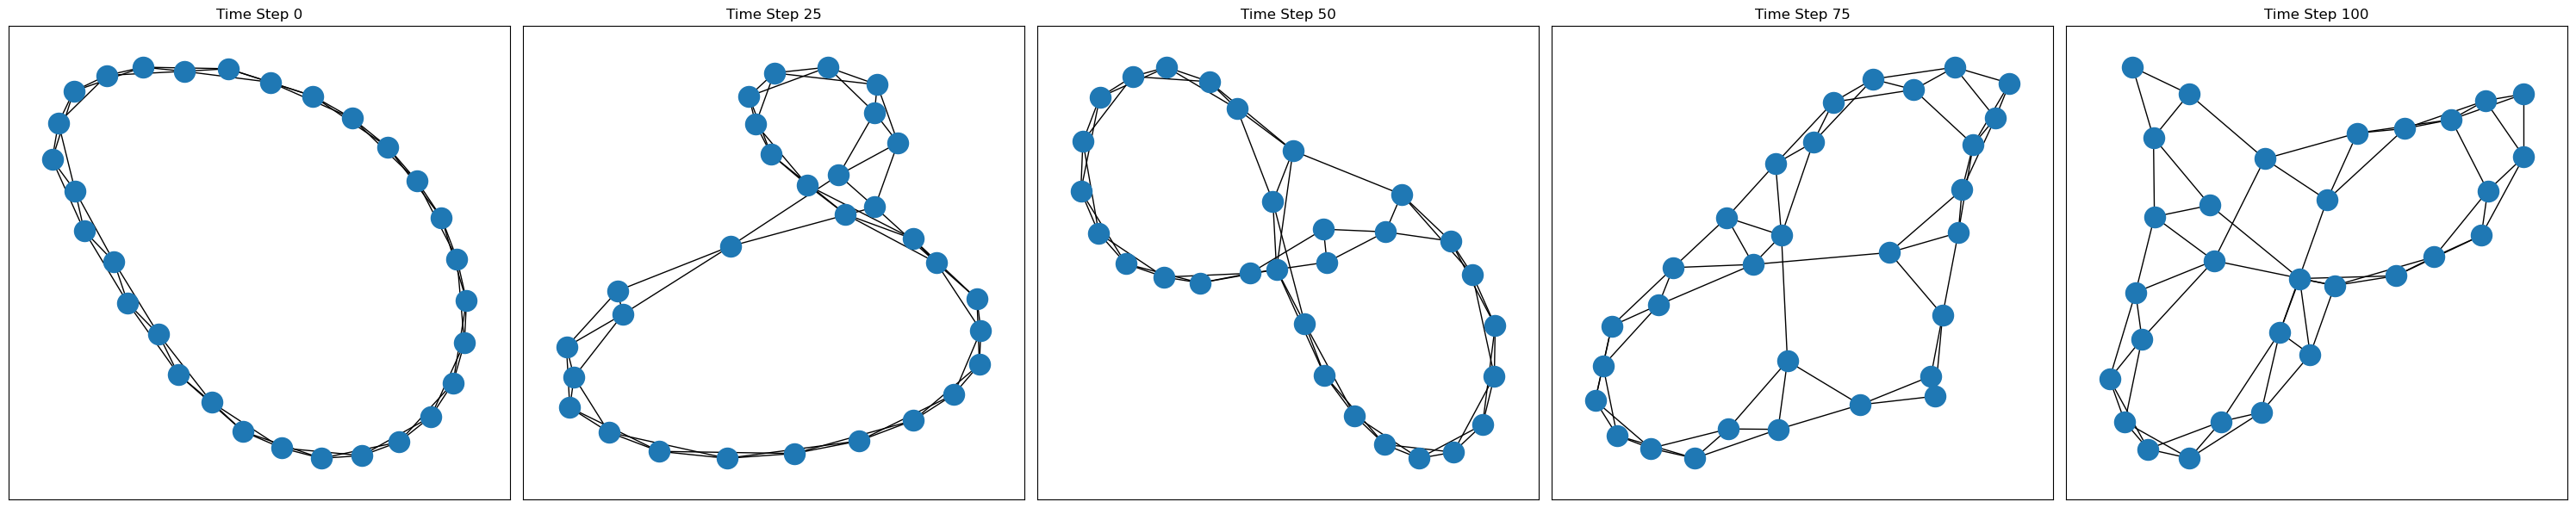

In [8]:
simulate_network_dynamics(n, k, 100)

Have Fun !!!